# Classifying Airplane Accidents Based on Severity

## Context

In 2018, there were [15 airplane accidents](https://www.cnn.com/2019/01/02/health/plane-crash-deaths-intl/index.html) of varying severity each year, with over 500 deaths. Although airplane safety continues to increase each year, we are interested in knowing if this number can be reduced further. We plan to investigate this by predicting the severity of a crash based on crash details, and determining which factors weight the most heavily on the severity of an accident. 

[Data Source](https://www.hackerearth.com/challenges/competitive/airplane-accident-severity-hackerearth-machine-learning-challenge/machine-learning/how-severe-can-an-airplane-accident-be-03e7a3f1/)

## Goals

- Predict the severity of an airplane accident based on several features:
    - Number of days since inspection 
    - Total safety complains
    - An estimation of how much control the pilot had during the incident
    - Turbulence
    - Cabin temperature
    - Accident type
    - Max elevation
    - Number of prior violations

## Imports

In [22]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

## Dataframe

In [2]:
# check out the original dataframe

df_train = pd.read_csv('3c055e822d5b11ea/train.csv')

df_train.head(15)

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054
5,Minor_Damage_And_Injuries,43.333333,15,0,73.336372,0.432954,78.63,2,29288.448105,1,0.394505,10947
6,Highly_Fatal_And_Damaging,22.009132,15,10,62.853236,0.314671,88.04,4,32342.109345,0,0.058872,4717
7,Minor_Damage_And_Injuries,24.703196,18,4,60.802188,0.548353,83.48,4,22547.195242,2,0.040419,8008
8,Highly_Fatal_And_Damaging,54.840183,5,40,69.234275,0.335587,78.24,2,45751.983413,0,0.619186,8179
9,Significant_Damage_And_Serious_Injuries,52.237443,6,4,57.429353,0.465410,79.56,1,37933.399001,1,1.389295,6324


In [3]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Safety_Score,10000.0,41.876406,16.138072,0.000000,30.593607,41.278539,52.511416,100.000000
Days_Since_Inspection,10000.0,12.931100,3.539803,1.000000,11.000000,13.000000,15.000000,23.000000
Total_Safety_Complaints,10000.0,6.564300,6.971982,0.000000,2.000000,4.000000,9.000000,54.000000
Control_Metric,10000.0,65.145324,11.882934,0.000000,56.927985,65.587967,73.336372,100.000000
Turbulence_In_gforces,10000.0,0.381495,0.121301,0.134000,0.293665,0.365879,0.451346,0.882648
Cabin_Temperature,10000.0,79.969331,2.759739,74.740000,77.960000,79.540000,81.560000,97.510000
Accident_Type_Code,10000.0,3.814900,1.902577,1.000000,2.000000,4.000000,5.000000,7.000000
Max_Elevation,10000.0,32001.803282,9431.995196,831.695553,25757.636908,32060.336419,38380.641513,64297.651218
Violations,10000.0,2.012200,1.039980,0.000000,1.000000,2.000000,3.000000,5.000000
Adverse_Weather_Metric,10000.0,0.255635,0.381128,0.000316,0.012063,0.074467,0.354059,2.365378


## Splitting and Training 

In [4]:
X = df_train.drop(['Severity'], axis=1)
y = df_train['Severity']

In [5]:
# one hot encoding for severity column 
# one hot encoding encodes categorical features as a one-hot numeric array

# set split = y target 
y_encoded = y

#integer encode the categorical values
le = LabelEncoder()
integer_encoded = le.fit_transform(y_encoded)
print(integer_encoded)

# setting y_train equal to the onehotencoded y values
y = integer_encoded
y

[1 1 2 ... 3 1 0]


array([1, 1, 2, ..., 3, 1, 0])

In [6]:
# train test split
# test_size is default of 75/25 split 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
X_train.shape

(7500, 11)

In [8]:
y_train.shape

(7500,)

In [9]:
# check for multicolinearity 

abs(X_train.corr()) > 0.75

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
Safety_Score,True,False,False,False,False,False,False,False,False,False,False
Days_Since_Inspection,False,True,False,False,False,False,False,False,False,False,False
Total_Safety_Complaints,False,False,True,False,False,False,False,False,False,False,False
Control_Metric,False,False,False,True,False,False,False,False,False,False,False
Turbulence_In_gforces,False,False,False,False,True,False,False,False,False,False,False
Cabin_Temperature,False,False,False,False,False,True,False,False,False,False,False
Accident_Type_Code,False,False,False,False,False,False,True,False,False,False,False
Max_Elevation,False,False,False,False,False,False,False,True,False,False,False
Violations,False,False,False,False,False,False,False,False,True,False,False
Adverse_Weather_Metric,False,False,False,False,False,False,False,False,False,True,False


# Modeling

We will try a few different modeling methods to see which one produces the most accurate results:

- Basic decision tree classifier, unbagged
- Basic decision tree classifier, bagged
- Random forest
- KNN
- Naive Bayes


### Unbagged Tree

The unbagged tree is a basic decision tree classifier with max depth set to None. This enables the classifier to run until it finds the optimal accuracy. 

In [10]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=None) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

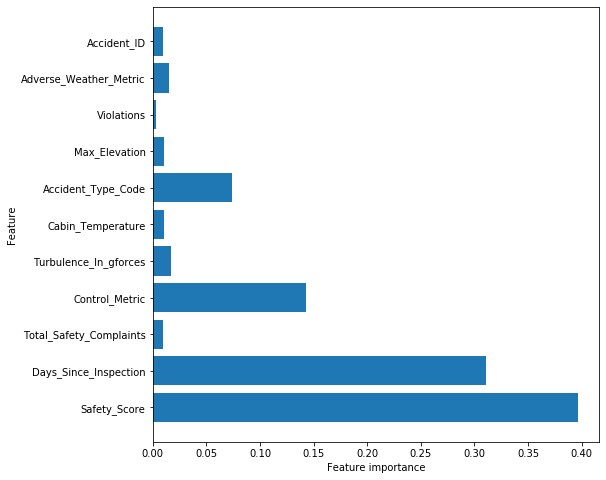

In [11]:
# unbagged feature importance
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [12]:
# training data accuracy score
tree_clf.score(X_train, y_train)

1.0

In [13]:
# test data accuracy score
tree_clf.score(X_test, y_test)

0.916

### Bagged Tree

The bagged tree is similar to the unbagged tree classifier, except it uses bagging to encourage diveristy in the "trees" our model samples. By bagging, we perfomr sampling with replacement which uses random parts of the dataset instead of the entire dataset.

In [14]:
# instantiate the BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=None), 
                                 n_estimators=20)

# fit to the training data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [15]:
# training data accuracy score
bagged_tree.score(X_train, y_train)

0.9990666666666667

In [16]:
# test data accuracy score
bagged_tree.score(X_test, y_test)

0.9352

### Random Forest

The Random Forest algorithm is a supervised learning algorithm that can be used for classification. It is an ensemble of decision tree classifiers. Ensemble methods are naturally robust because they are resistant to variance in the data. 

In [17]:
# instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=None)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
# forest train accuracy score
forest.score(X_train, y_train)

1.0

In [19]:
# forest test accuracy score
forest.score(X_test, y_test)

0.9228

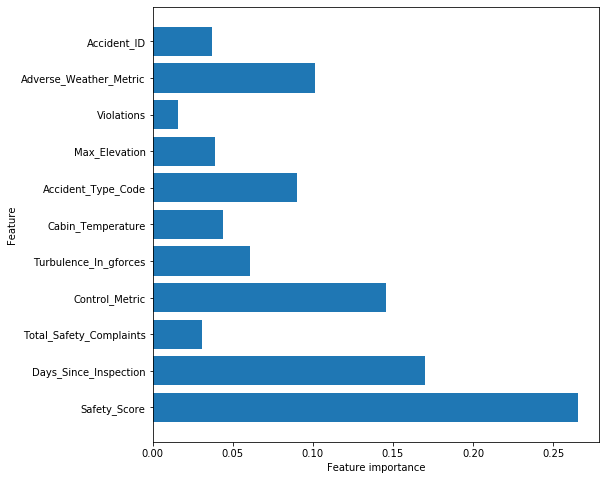

In [20]:
# feature importance 
plot_feature_importances(forest)

#### Using RandomSearch To Improve Our Random Forest Model

In [23]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
random_forest = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

### KNN

### Naive Bayes

In [ ]:
# scaling the X_train data using StandardScaler
#X_train = X_train
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(X_train)

#scaled_data